**1. Loading and Preprocessing **(replace missing values with 0)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('Country_des_id.csv')

# Fill missing values in 'Value' column with 0
df['Value'].fillna(0, inplace=True)

# Filter data for the years 2018 to 2022
df_filtered = df[df['TIME'].between(2018, 2022)]

**2. Determine the Top 10 Destinations for Each Year**

To visualize the top 10 destinations per year, we need to group the data by both 'Country' and 'TIME' and then sort it for each year

In [5]:
# Create an empty dictionary to store top 10 data per year
top10_per_year = {}

# Iterate over each year to get the top 10 destinations
for year in range(2018, 2023):
    # Filter data for the current year
    df_year = df_filtered[df_filtered['TIME'] == year]

    # Group by 'Country' and sum the 'Value'
    df_grouped = df_year.groupby('Country')['Value'].sum().reset_index()

    # Sort the data by 'Value' in descending order and select the top 10
    df_top10 = df_grouped.sort_values(by='Value', ascending=False).head(10)

    # Store the result in the dictionary
    top10_per_year[year] = df_top10

**3. Visualizing Top 10 Destinations Each year with Bar Chart**

<ipython-input-6-b77d93617d60>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Country', data=df_top10, palette='viridis', ax=ax)
<ipython-input-6-b77d93617d60>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Country', data=df_top10, palette='viridis', ax=ax)
<ipython-input-6-b77d93617d60>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Country', data=df_top10, palette='viridis', ax=ax)
<ipython-input-6-b77d93617d60>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

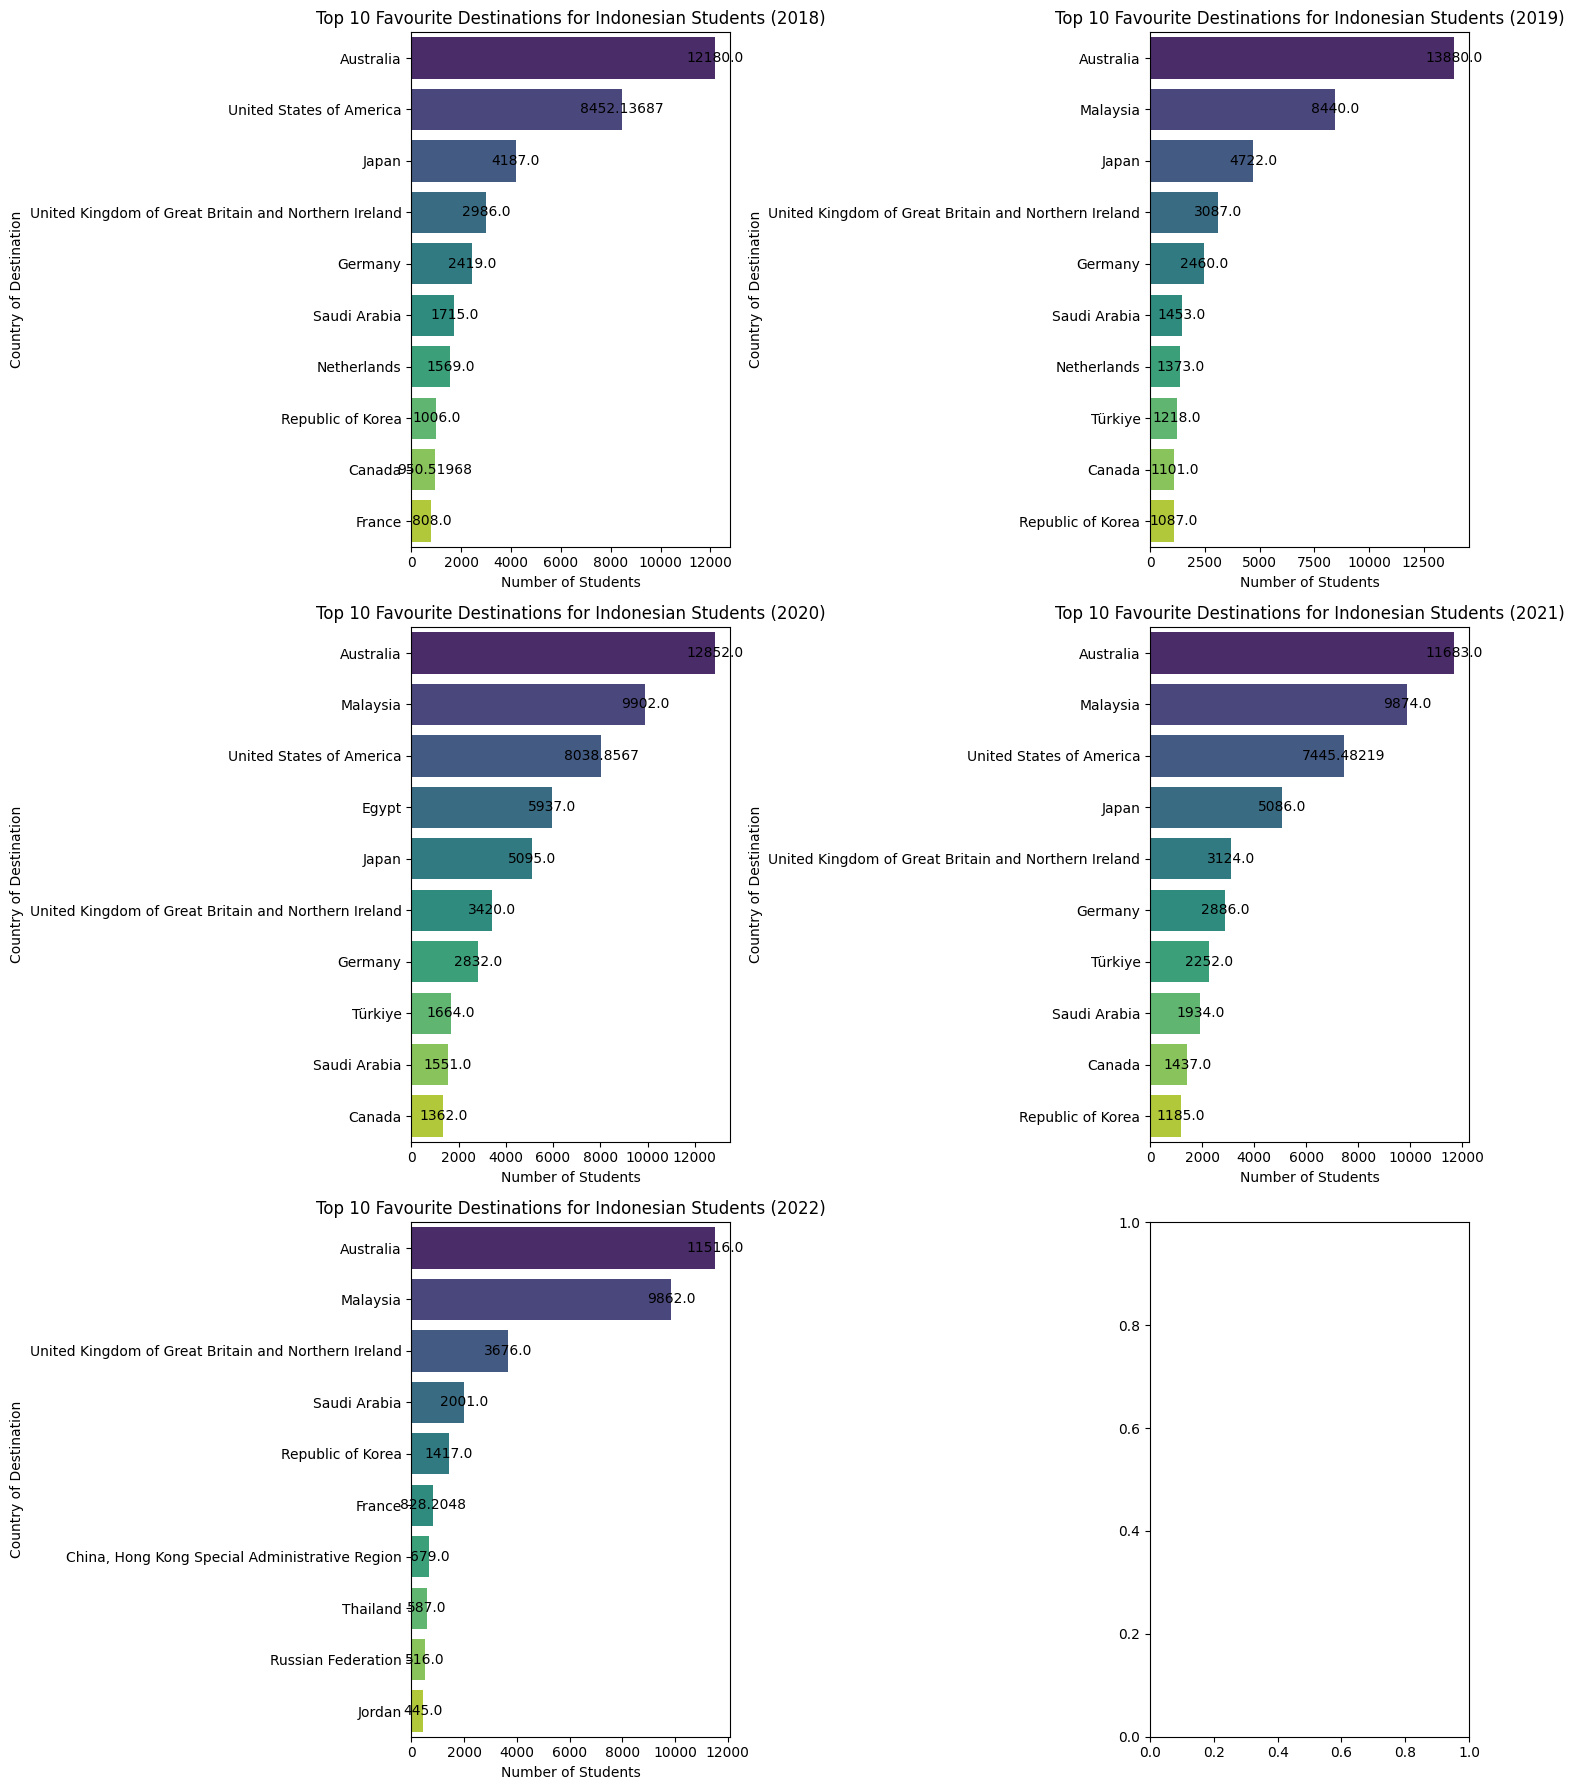

In [6]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each year and plot the data
for i, (year, df_top10) in enumerate(top10_per_year.items()):
    ax = axes[i]
    sns.barplot(x='Value', y='Country', data=df_top10, palette='viridis', ax=ax)

    # Add number labels to each bar
    for j in range(len(df_top10)):
        ax.text(
            df_top10['Value'].iloc[j] + 5,  # Add some space to the right of the bar
            j,  # y-coordinate of the text
            df_top10['Value'].iloc[j],  # Text value
            color='black',  # Text color
            ha='center',  # Horizontal alignment
            va='center'  # Vertical alignment
        )

    ax.set_title(f'Top 10 Favourite Destinations for Indonesian Students ({year})')
    ax.set_xlabel('Number of Students')
    ax.set_ylabel('Country of Destination')

# Adjust layout
plt.tight_layout()
plt.show()
